In [22]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Conv2D,Flatten
from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
csv_url='mrec20190331sh.csv'

In [3]:
MM= pandas.read_csv(csv_url)
#Mdataset=shuffle(MM)
Mdataset=MM
#Mdataset=MM.sample(frac=1)
Mdataset.head(24)

,time,date,training,step,up,slice,C_1,C_2,C_3,C_4,...,C_247,C_248,C_249,C_250,C_251,C_252,C_253,C_254,C_255,C_256
0,1554034537051,13:15:37.051,0,1,1,9873,3311,-8424,-14348,-11785,...,-703,-848,-890,-908,-1106,-855,-769,-710,-713,-748
1,1554034537709,13:15:37.709,0,2,1,12569,-8390,-1895,4840,8879,...,-940,-997,-926,-787,-833,-643,-695,-760,-806,-846
2,1554034538958,13:15:38.958,0,3,1,11691,9960,3584,-1011,-3440,...,-353,-261,-140,-63,-3,-54,-222,-438,-735,-1038
3,1554034539517,13:15:39.517,0,4,1,16388,-4219,17444,29735,17571,...,-1423,-1067,-966,-944,-967,-939,-974,-471,-23,397
4,1554034540136,13:15:40.136,0,5,1,13925,-9635,-11919,-10869,-11225,...,-79,-382,-895,-1106,-1431,-1630,-1753,-1819,-1783,-1643
5,1554034540320,13:15:40.320,0,6,1,8695,7561,5607,3202,818,...,-9937,-4191,-4217,-7211,-8503,-9931,-4207,500,3596,4640
6,1554034540838,13:15:40.838,0,7,1,19007,-16506,-16234,-7873,-1754,...,12,-769,-1167,-1490,-1619,-1646,-1620,-1580,-1882,-1431
7,1554034541375,13:15:41.375,0,8,1,12306,10725,8741,10883,15438,...,-1645,-1366,-932,-557,-82,270,558,816,939,964
8,1554034541990,13:15:41.990,0,9,1,26906,26414,5157,3967,-946,...,-5562,-12275,-11015,-5335,2087,6079,5042,467,-3707,-4560
9,1554034542523,13:15:42.523,0,10,1,12275,-11015,-5335,2087,6079,...,-2498,175,2665,4432,5308,5302,4452,3323,2049,1011


In [4]:
Xdataset=Mdataset.iloc[:,6:]
Xdataset.head(4)

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_247,C_248,C_249,C_250,C_251,C_252,C_253,C_254,C_255,C_256
0,3311,-8424,-14348,-11785,-5846,-74,6483,10854,8958,3077,...,-703,-848,-890,-908,-1106,-855,-769,-710,-713,-748
1,-8390,-1895,4840,8879,7945,6713,7590,5645,987,-3971,...,-940,-997,-926,-787,-833,-643,-695,-760,-806,-846
2,9960,3584,-1011,-3440,-7359,-10049,-10841,-7682,-4571,-4545,...,-353,-261,-140,-63,-3,-54,-222,-438,-735,-1038
3,-4219,17444,29735,17571,14220,1151,-3328,-11782,-17347,-15046,...,-1423,-1067,-966,-944,-967,-939,-974,-471,-23,397


In [5]:
Ydataset = Mdataset['up']
Ydataset.head(14)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
Name: up, dtype: int64

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Xdataset)
dataset[0]

array([0.65298494, 0.53358157, 0.58764058, 0.46802782, 0.25985673,
       0.33055768, 0.55646088, 0.48705446, 0.52873246, 0.56633552,
       0.63915626, 0.6899636 , 0.60835624, 0.66903624, 0.72397307,
       0.5956136 , 0.41953412, 0.43558098, 0.6553896 , 0.57188177,
       0.55546405, 0.52378299, 0.49008583, 0.41469573, 0.51146027,
       0.64188322, 0.62134487, 0.54275533, 0.4766241 , 0.44160866,
       0.40413675, 0.46795753, 0.59285229, 0.64606764, 0.7269184 ,
       0.62876771, 0.59532953, 0.66662612, 0.56844846, 0.47230405,
       0.38874873, 0.41223675, 0.35273873, 0.18869893, 0.16971047,
       0.17668268, 0.25504363, 0.47491157, 0.79049728, 0.8358205 ,
       0.87321842, 0.830711  , 0.69833247, 0.55428451, 0.55939282,
       0.60205155, 0.56147817, 0.47158267, 0.46821345, 0.5150428 ,
       0.54093576, 0.51928111, 0.4401433 , 0.5258795 , 0.65229264,
       0.64956104, 0.64467455, 0.64918287, 0.67029863, 0.65409901,
       0.60534911, 0.65710679, 0.71710706, 0.71209846, 0.60837

In [7]:
#dataset=dataset.reshape((dataset.shape[0],1,-1))
dataset=dataset.reshape(dataset.shape+(1,))
print(dataset.shape)
dataset[0,0]

(579, 256, 1)


array([0.65298494])

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
trainX, testX = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(trainX), len(testX))

387 192


In [10]:
# reshape into X=t and Y=t+1
look_width = 48
look_height=32
from sklearn import preprocessing 
from sklearn import utils
from io import StringIO

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
le = preprocessing.LabelEncoder()
YN=utils.column_or_1d(Ydataset, warn=True)



In [11]:
YO=le.fit_transform(YN)
YO
len(le.classes_)
Yclasses=len(le.classes_)
print(Yclasses)

2


In [12]:
trainY = YO[0:train_size]
testY=YO[train_size:len(YO)]
print('data:',len(trainY), len(testY))


data: 387 192


In [13]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
trainX.shape

(387, 256, 1)

In [15]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0],  trainX.shape[2],2))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
#print('trainyo',trainYO.shape)


(387, 256, 1)
(387,)


In [28]:
seq_length = trainX.shape[1]
print(seq_length)

model = Sequential()
model.add(Conv1D(32, 1, activation='relu', input_shape=(seq_length,1)))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dense(256))
#model.add(Flatten())
model.add(Conv1D(128,1 ))
model.add(MaxPooling1D())
#model.add(Conv1D(128, 1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(Yclasses, activation='softmax'))
model.summary()

256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 256, 32)           64        
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 256, 64)           2112      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 256, 64)           0         
_________________________________________________________________
dense_11 (Dense)             (None, 256, 256)          16640     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 256, 128)          32896     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 128, 128)          0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
______

In [29]:
trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(trainX, trainYO, epochs=100)


Epoch 1/100
387/387 [==============================] - 1s 2ms/step - loss: 0.7121 - acc: 0.4858
Epoch 2/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6969 - acc: 0.4806
Epoch 3/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6958 - acc: 0.4987
Epoch 4/100
387/387 [==============================] - 1s 2ms/step - loss: 0.7094 - acc: 0.4599
Epoch 5/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6978 - acc: 0.5065
Epoch 6/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6995 - acc: 0.4677
Epoch 7/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6968 - acc: 0.4884
Epoch 8/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5039
Epoch 9/100
387/387 [==============================] - 1s 2ms/step - loss: 0.7007 - acc: 0.4651
Epoch 10/100
387/387 [==============================] - 1s 2ms/step - loss: 0.7019 - acc: 0.5039
Epoch 11/100
387/387 [=================

387/387 [==============================] - 1s 2ms/step - loss: 0.6938 - acc: 0.4548
Epoch 86/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6940 - acc: 0.5013
Epoch 87/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6937 - acc: 0.5013
Epoch 88/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6936 - acc: 0.5039
Epoch 89/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6937 - acc: 0.5065
Epoch 90/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6938 - acc: 0.4548
Epoch 91/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6939 - acc: 0.4987
Epoch 92/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.5013
Epoch 93/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6936 - acc: 0.4625
Epoch 94/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6935 - acc: 0.4832
Epoch 95/100
387/387 [=====================

In [240]:
score = model.evaluate(testX, testYO)
print(score)

192/192 [==============================] - 0s 1ms/step
[0.6912496984004974, 0.5572916666666666]


In [207]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

387/387 [==============================] - 0s 26us/step
Test loss: 0.4912018819064749
Test accuracy: 0.7467700259938105


In [175]:
# Keras reported accuracy:
score = model.evaluate(testX,testYO, verbose=0) 
print(score[1])
# 0.98580000000000001

# Actual accuracy calculated manually:
predY= model.predict(trainX)
acc = sum([numpy.argmax(trainYO[i])==numpy.argmax(predY[i]) for i in range(len(trainYO))])/len(trainYO)
print(acc)
# 0.98580000000000001

print(score[1]==acc)
# True    

0.734375
0.7286821705426356
False


In [208]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
#trainPredict1

In [177]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
diffY=testPredict-testY

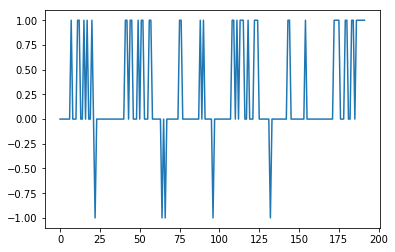

In [178]:
plt.plot(diffY)
plt.show()

In [71]:

# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [72]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 5.460 RMSE
Test Score: 5.301 RMSE


In [73]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

(578, 256, 1)


NameError: name 'look_back' is not defined

In [74]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (387) into shape (387,1)